In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

import zipfile

with zipfile.ZipFile("train.zip","r") as z:
    z.extractall(".")
    
# with zipfile.ZipFile("../input/test1.zip","r") as z:
#     z.extractall(".")

# Any results you write to the current directory are saved as output.

#print(os.listdir("/kaggle/working/train"))

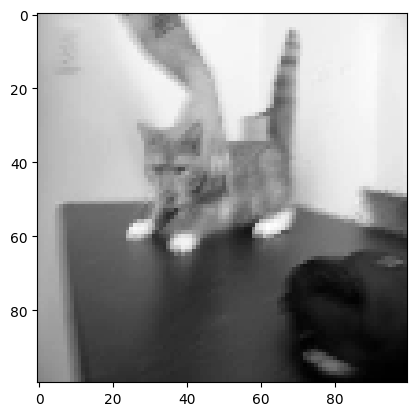

In [2]:
for p in os.listdir("train/"):
    category = p.split(".")[0]
    img_array = cv2.imread(os.path.join("train/",p),cv2.IMREAD_GRAYSCALE)
    new_img_array = cv2.resize(img_array, dsize=(100, 100))
    plt.imshow(new_img_array,cmap="gray")
    break

In [3]:
X = []
y = []
convert = lambda category : int(category == 'dog')
def create_test_data(path):
    for p in os.listdir(path):
        category = p.split(".")[0]
        category = convert(category)
        img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(80, 80))
        X.append(new_img_array)
        y.append(category)

In [4]:
create_test_data("train/")
X = np.array(X).reshape(-1, 80,80,1)
y = np.array(y)

In [42]:
X.shape, y.shape

((25000, 80, 80, 1), (25000,))

In [ ]:
#import pickle

#pickle.dump( X, open( "train_x", "wb" ) )
#pickle.dump( y, open( "train_y", "wb" ) )


In [5]:
#Normalize data
X = X/255.0

In [7]:
model = Sequential()
# Adds a densely-connected layer with 64 units to the model:
model.add(Conv2D(64,(3,3), activation = 'relu', input_shape = X.shape[1:]))
model.add(MaxPooling2D(pool_size = (2,2)))
# Add another:
model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
# Add a softmax layer with 10 output units:
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])

Now we will fit our model with training data.

Epochs :- How many times our model will go through data

Batch size :- How much amount of data at once you wanna pass through the model

validation_split :- How much amount of data (in this case its 20 %) you will need to check cross validation error

In [8]:
model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 95s 150ms/step - loss: 0.6265 - accuracy: 0.6470 - val_loss: 0.8368 - val_accuracy: 0.4542
Epoch 2/10
625/625 [==============================] - 166s 266ms/step - loss: 0.5119 - accuracy: 0.7501 - val_loss: 0.6637 - val_accuracy: 0.6500
Epoch 3/10
625/625 [==============================] - 245s 392ms/step - loss: 0.4494 - accuracy: 0.7885 - val_loss: 0.5095 - val_accuracy: 0.7732
Epoch 4/10
625/625 [==============================] - 213s 341ms/step - loss: 0.3925 - accuracy: 0.8246 - val_loss: 0.4672 - val_accuracy: 0.7912
Epoch 5/10
625/625 [==============================] - 223s 357ms/step - loss: 0.3476 - accuracy: 0.8470 - val_loss: 0.5992 - val_accuracy: 0.7334
Epoch 6/10
625/625 [==============================] - 223s 357ms/step - loss: 0.2944 - accuracy: 0.8729 - val_loss: 0.3742 - val_accuracy: 0.8488
Epoch 7/10
625/625 [==============================] - 140s 225ms/step - loss: 0.2389 - accuracy: 0.9002 - val_loss: 0.5295 - 

In [31]:
X_test = []
y_test = []
convert = lambda category : int(category == 'dog')
def create_test_data(path):
    for p in os.listdir(path):
        category = p.split(".")[0]
        category = convert(category)
        img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(80, 80))
        X_test.append(new_img_array)
        y_test.append(category)

In [32]:
for p in os.listdir("test/"):
    print(p)

1.jpg
2.jpg
3.jpg


In [33]:
create_test_data("test/")
X_test = np.array(X_test).reshape(-1, 80,80,1)
y_test = np.array(y_test)

In [34]:
#Normalize data
X_test = X_test/255.0

In [35]:
predictions = model.predict(X_test)

1/1 [==============================] - 0s 27ms/step


In [36]:
predictions

array([[0.05013541],
       [0.9997312 ],
       [0.99930805]], dtype=float32)